# Moving-Point-Charges Tutorial

The *moving-point-charge* Python package is used to calculate the components of the electric and magnetic fields, as well as the scalar and vector potentials, generated by moving point charges. In this tutorial, we will cover how to simulate and visualize these fields.

The package contains two main modules: *charges.py* and *field_calculations.py*. The charge objects to be placed in the simulation are found in the *charges.py* file. There are several premade charge classes that follow specified trajectories, including oscillating and radially orbitting charges. Custom charge classes can be created using the abstract *Charge* class as the parent class. The *MovingChargesField* class in *field_calculations.py* is instantiated with the list of charges in the simulation.  

First, let's add a single oscillating charge to the field. The *OscillatingCharge* class has several instantiation parameters:
- pos_charge [Boolean]: determines if charge value is +e or -e
- start_position [list]: initial (x, y, z) position of charge in meters
- direction [list]: initial (x, y, z) direction of velocity
- amplitude [float]: amplitude of oscillating charge in meters
- max_speed [float]: maximum speed of charge in meters/second
- start_zero [Boolean]: determines if charge starts moving at t=0s
- stop_t [Float]: determines time that charge stops moving; None otherwise

In [1]:
from charges import OscillatingCharge
from field_calculations import MovingChargesField
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")  # suppress warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.constants as constants
c = constants.c  # set speed of light constant

We will first create a positive oscillating charge that starts at $x$=-2 nm, oscillates in the $x$ direction, and has a maximum speed of 0.5$c$. This charge object is then used as the input parameter for *MovingChargesField*:

In [2]:
charge = OscillatingCharge(pos_charge=True, direction=(1, 0, 0), start_position=(-2e-9, 0, 0), max_speed=0.5*c)
field = MovingChargesField(charge)

The $E$ and $B$ fields are calculated using the *calculate_E* and *calculate_B* methods for the *MovingChargesField* object. The numpy meshgrid function is used to set the position of the field points to be calculated. The *calculate_E* and *calculate_B* methods return a list of $E_x$, $E_y$, and $E_z$ ndarrays which are 2-dimensional if plane is True (otherwise 3-dimensional) and require the following parameters:
- t [float]: time of simulation in seconds
- x [3d ndarray]: meshgrid of x values in meters
- y [3d ndarray]: meshgrid of y values in meters
- z [3d ndarray]: meshgrid of z values in meters
- pcharge_fields [string]: determines which field generated from the point charges is calculated: 'Velocity', 'Acceleration', or 'Total' (default is 'Total')
- plane [Boolean]: True if meshgrid is 2 dimensional and returns 2D array; defaults to False

Let's calculate the Total, Acceleration, and Velocity $E$ and $B$ fields along the $xz$ plane from -50 nm to +50 nm at t=0s using a grid size of 101$\times$101:

In [3]:
t = 0
lim = 50e-9  # 50 nm
grid_size = 101  # number of points along x and z direction
X, Y, Z = np.meshgrid(np.linspace(-lim, lim, grid_size), 0,
                      np.linspace(-lim, lim, grid_size), indexing='ij')
E_total = field.calculate_E(t=t, X=X, Y=Y, Z=Z, pcharge_field='Total', plane=True)
B_total = field.calculate_B(t=t, X=X, Y=Y, Z=Z, pcharge_field='Total', plane=True)
E_acc = field.calculate_E(t=t, X=X, Y=Y, Z=Z, pcharge_field='Acceleration', plane=True)
B_acc = field.calculate_B(t=t, X=X, Y=Y, Z=Z, pcharge_field='Acceleration', plane=True)
E_vel = field.calculate_E(t=t, X=X, Y=Y, Z=Z, pcharge_field='Velocity', plane=True)
B_vel = field.calculate_B(t=t, X=X, Y=Y, Z=Z, pcharge_field='Velocity', plane=True)

First, let's plot the $x$-component of the total $E$ field. We use the matplotlib function *imshow* to plot the $E_x$ field along the $xz$ plane and use a logarithmic scale that is linear around zero to allow negative values:

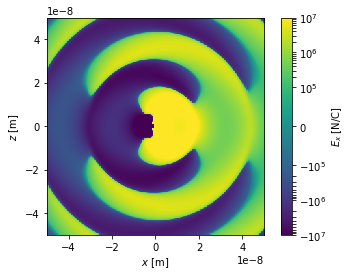

In [4]:
im = plt.imshow(E_total[0].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
im.set_norm(mpl.colors.SymLogNorm(linthresh=1e5, linscale=1, vmin=-1e7, vmax=1e7, base=10))
plt.colorbar(im, label='$E_x$ [N/C]')
plt.xlabel('$x$ [m]')
plt.ylabel('$z$ [m]')
plt.show()

Now, by using more advanced matplotlib functionality, we can plot the total, velocity (i.e. Coulomb), and acceleration (i.e. radiation) fields on the same figure. Below, we plot the $x$-component of these three fields:

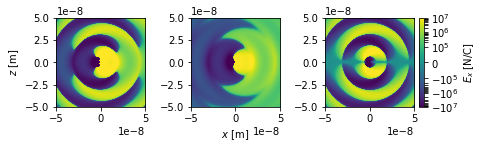

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ims = [None]*3
ims[0] = axes[0].imshow(E_total[0].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
ims[1] = axes[1].imshow(E_vel[0].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
ims[2] = axes[2].imshow(E_acc[0].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
for i in range(0, 3):
    ims[i].set_norm(mpl.colors.SymLogNorm(linthresh=1e5, linscale=1, vmin=-1e7, vmax=1e7, base=10))

# Add colorbar for E fields
Ecax = inset_axes(axes[2],
                  width="6%",
                  height="100%",  
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axes[2].transAxes,
                  borderpad=0,
                  )
plt.colorbar(ims[2], cax=Ecax, label='$E_x$ [N/C]')
axes[1].set_xlabel('$x$ [m]')
axes[0].set_ylabel('$z$ [m]')
plt.tight_layout()
plt.show()

Similary, the $x$, $y$, and $z$ components of a field can be plotted on the same figure. Below, we plot the three components of the total $E$ field (note that $E_y$ is zero):

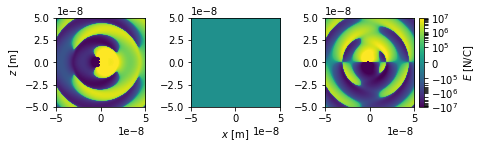

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3)
ims = [None]*3
ims[0] = axes[0].imshow(E_total[0].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
ims[1] = axes[1].imshow(E_total[1].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
ims[2] = axes[2].imshow(E_total[2].T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
for i in range(0, 3):
    ims[i].set_norm(mpl.colors.SymLogNorm(linthresh=1e5, linscale=1, vmin=-1e7, vmax=1e7, base=10))

# Add colorbar for E fields
Ecax = inset_axes(axes[2],
                  width="6%",  # width = 5% of parent_bbox width
                  height="100%",  # height : 50%
                  loc='lower left',
                  bbox_to_anchor=(1.05, 0., 1, 1),
                  bbox_transform=axes[2].transAxes,
                  borderpad=0,
                  )
plt.colorbar(ims[2], cax=Ecax, label='$E$ [N/C]')
axes[1].set_xlabel('$x$ [m]')
axes[0].set_ylabel('$z$ [m]')
plt.tight_layout()
plt.show()

We can also calculate and plot the scalar ($V$) and vector potentials ($A$) using the *calculate_potentials* method from the *MovingChargeField* object. This returns a list of $V$, $A_x$, $A_y$, and $A_z$. As an example, below we plot the scalar potential along the $xz$ plane:

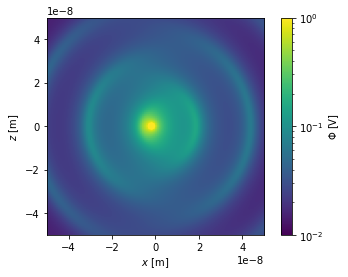

In [7]:
V, Ax, Ay, Az = field.calculate_potentials(t=t, X=X, Y=Y, Z=Z, plane=True)
im = plt.imshow(V.T, cmap='viridis', origin='lower', aspect='equal', extent=(-lim, lim, -lim, lim))
im.set_norm(mpl.colors.LogNorm(vmin=1e-2, vmax=1e0))
plt.colorbar(im, label='$\Phi$ [V]')
plt.xlabel('$x$ [m]')
plt.ylabel('$z$ [m]')
plt.show()

For more example uses of the *moving-point-charge* package, check the python files in the *Paper_Figures* folder which contain code for animation, plotting the Poynting vector, quiver plots, publication-quality figures, and more! 